# Internship Test Part 2
## Machine Learning Hackathon


In [74]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv('c:/Divya/dataframe_.csv')

df.head()

input      output
0 -122.740667 -130.572085
1 -121.531419 -129.938929
2 -134.917019 -130.141832
3 -120.605951 -125.760932
4 -129.894781 -112.785214

In [76]:
df.shape

(1697, 2)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [78]:
df.describe()

input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495

In [79]:
df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1692     True
1693     True
1694     True
1695     True
1696     True
Length: 1697, dtype: bool

False    1091
True      606
dtype: int64

In [80]:
df[df.duplicated()].max

<bound method NDFrame._add_numeric_operations.<locals>.max of            input      output
106   -63.366669  -33.000000
464   112.633331  103.000000
715   -31.366669  -49.000000
819  -117.366669  -75.000000
865  -131.366669 -125.000000
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[606 rows x 2 columns]>

In [81]:
df.drop_duplicates(keep='first')  

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1107 -119.954237  123.609122
1108 -109.942155  127.197394
1109 -111.515368  128.170885
1110 -110.344221  123.087950
1439         NaN         NaN

[1091 rows x 2 columns]

In [82]:
df.drop_duplicates(keep='first', inplace =True)

In [83]:
# null values
df.isna()

input  output
0     False   False
1     False   False
2     False   False
3     False   False
4     False   False
...     ...     ...
1107  False   False
1108  False   False
1109  False   False
1110  False   False
1439   True    True

[1091 rows x 2 columns]

In [84]:
df.isna().sum()

input     1
output    1
dtype: int64

In [85]:
a = round(df.input.mean(),2)
b = round(df.output.mean(),2)


In [86]:
df.input.replace( np.nan, a, inplace = True)
df.output.replace( np.nan,b, inplace = True)

In [87]:
df.isna().sum()

input     0
output    0
dtype: int64

In [88]:
df.skew()

input    -0.283802
output    0.922656
dtype: float64

In [89]:
# finding outlier
Q1, Q2, Q3 = tuple(df.output.quantile(q = [0.25,0.5,  0.75]).values)

In [90]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

82.0639959045 128.17139466125 -200.08458895675


In [91]:
df[(df.output > UL) | (df.output < LL)].count()

input     17
output    17
dtype: int64

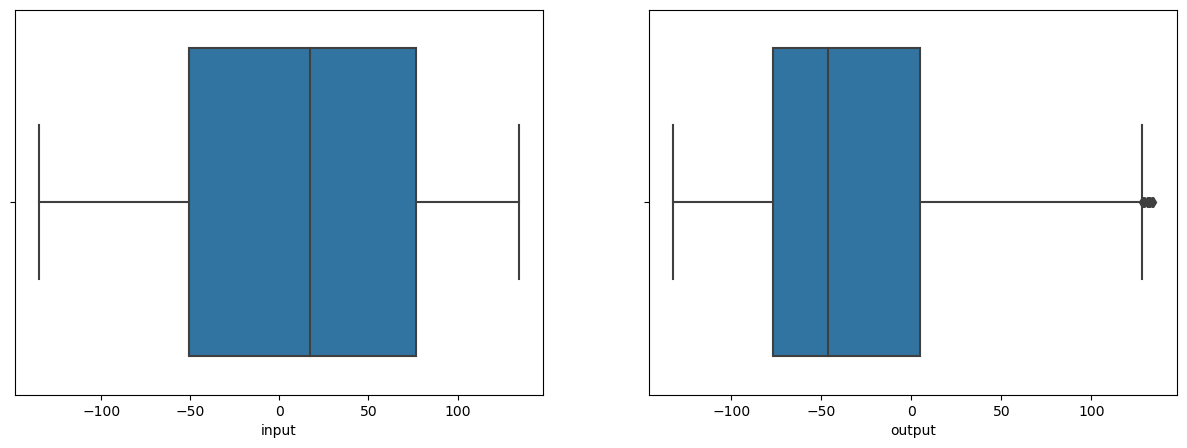

In [92]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.input)

plt.subplot(122)
sns.boxplot(df.output);

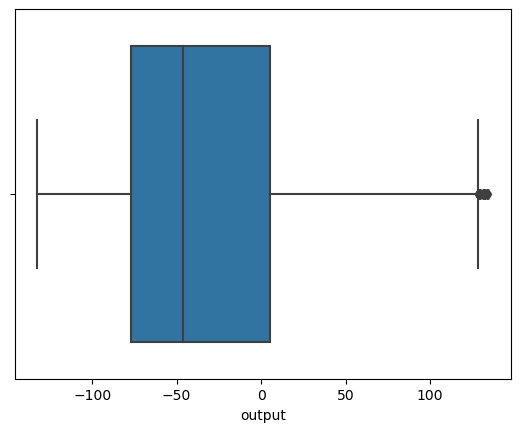

In [93]:
sns.boxplot(df.output);

In [94]:
print(df.output.var())
print(df.output.std())

4670.427348674271
68.34052493706989


In [95]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [96]:
# Normalization
mm = MinMaxScaler()

In [97]:
df_output_Norm = mm.fit_transform(df.output.values.reshape(-1,1))

In [98]:
print(df_output_Norm.min())
print(df_output_Norm.max())

0.0
1.0


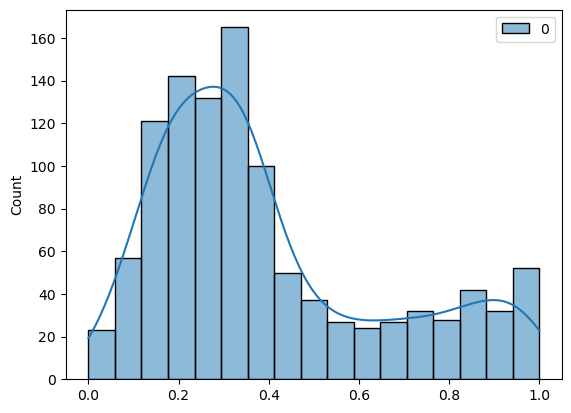

In [99]:
sns.histplot(df_output_Norm, kde = True);

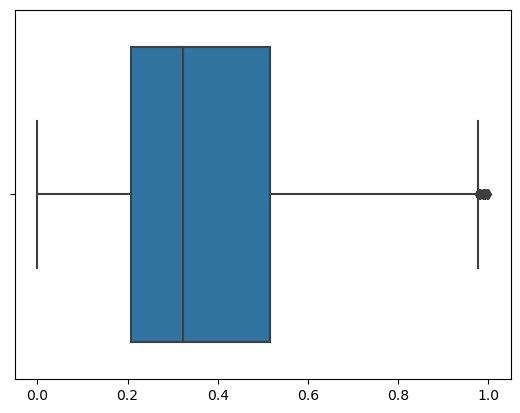

In [100]:
sns.boxplot(df_output_Norm);

In [101]:
# log transformation
np.log(df.output)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1107    4.817124
1108    4.845740
1109    4.853364
1110    4.812899
1439         NaN
Name: output, Length: 1091, dtype: float64

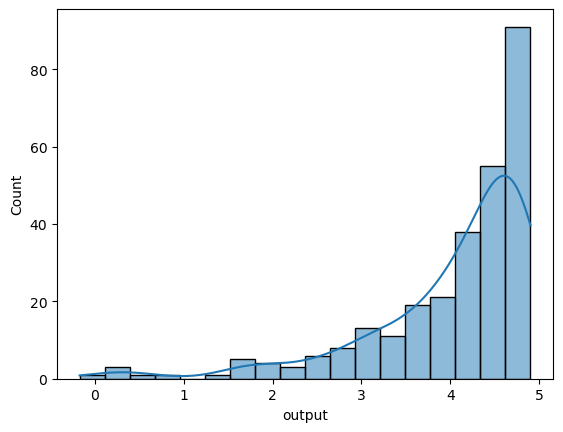

In [102]:
sns.histplot(np.log(df.output), kde = True);

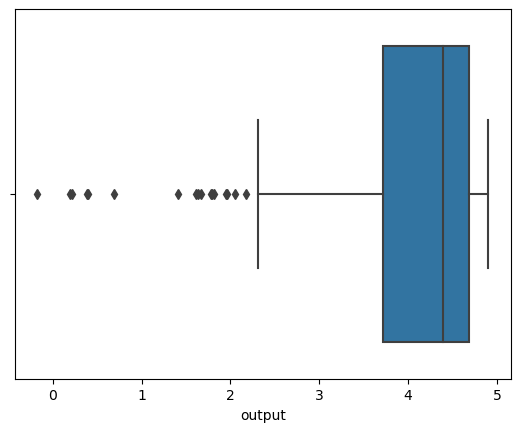

In [103]:
sns.boxplot(np.log(df.output));

In [104]:
# cube transformation
output_trans = df.output**(1/3)
output_trans

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1107    4.981386
1108    5.029129
1109    5.041926
1110    4.974375
1439         NaN
Name: output, Length: 1091, dtype: float64

In [105]:
sns.boxplot(df.output**(1/3));

In [106]:
print((df.output**(1/3)).skew())
print(df.output.skew())

-1.0604091448640767
0.9226558131064094


## obervation
- from above transformation cube root transformation is better 


In [107]:
sns.pairplot(df)

# Data Preparation


In [108]:
import sklearn

In [109]:
df.columns

Index(['input', 'output'], dtype='object')

In [110]:
df.columns.nunique()

2

In [111]:
# Identifying the inputs (X) and output (y)

y = df['output']

X = df[['input']]

In [112]:
df.dtypes

input     float64
output    float64
dtype: object

In [113]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [114]:
X_train.head()

input
603  32.633331
535  80.633331
245  34.475043
690  -6.532765
321  85.241190

In [115]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(818, 1) (818,)
(273, 1) (273,)


In [116]:
# Preparing train Data
#scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_transformed.head()

input
603  0.314222
535  0.918608
245  0.337412
690 -0.178932
321  0.976627

In [117]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 1
Mean of each column: [7.67795509]
Std of each column: [79.41952056]


In [118]:
df

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1107 -119.954237  123.609122
1108 -109.942155  127.197394
1109 -111.515368  128.170885
1110 -110.344221  123.087950
1439    8.120000  -27.380000

[1091 rows x 2 columns]

In [119]:
# Preparing Test Data
X_test_transformed = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_transformed.head()

input
1004  0.868242
899  -0.005696
157  -0.690846
652  -0.113980
469   1.155094

# Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [121]:
y_test_pred = regressor.predict(X_test_transformed)

In [122]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

Actual  Predicted
1004  -15.000000   2.925714
899   -97.376142 -28.910137
157   -67.569154 -53.868799
652  -104.595355 -32.854691
469    85.239286  13.375146

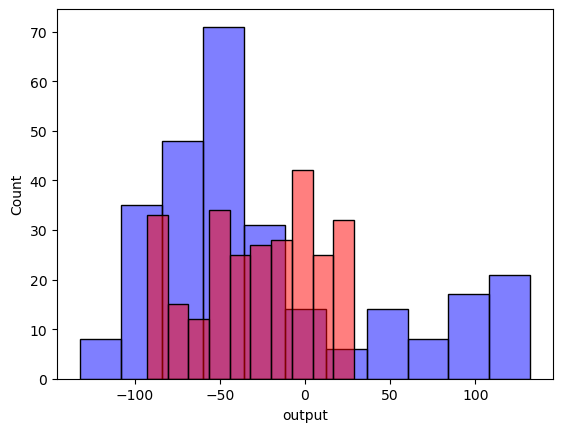

In [123]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [124]:
from sklearn import metrics

Mean_Absolute_Error_LR = metrics.mean_absolute_error(y_test, y_test_pred)
Mean_Squared_Error_LR = metrics.mean_squared_error(y_test, y_test_pred)
Root_Mean_Squared_Error_LR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',Mean_Absolute_Error_LR)

print('Mean Squared Error: ', Mean_Squared_Error_LR)

print('Root Mean Squared Error: ', Root_Mean_Squared_Error_LR)

Mean Absolute Error:  46.29072592667424
Mean Squared Error:  3953.225299765986
Root Mean Squared Error:  62.87467932137695


# KNN Regression

In [125]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [126]:
y_test_pred = regressor.predict(X_test_transformed)

In [127]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

Actual  Predicted
1004  -15.000000 -16.511392
899   -97.376142 -80.128677
157   -67.569154 -40.628055
652  -104.595355 -84.383860
469    85.239286  81.201061

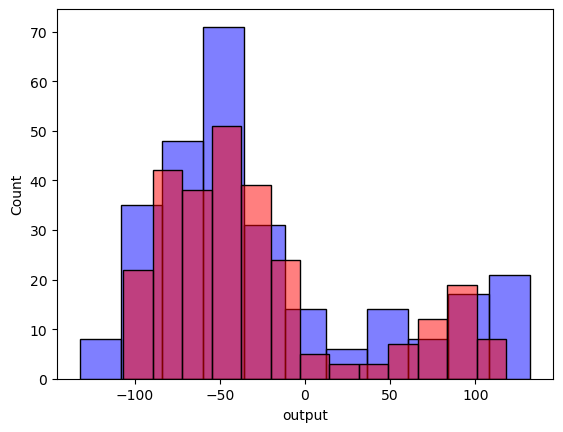

In [128]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [129]:

Mean_Absolute_Error_KNN = metrics.mean_absolute_error(y_test, y_test_pred)
Mean_Squared_Error_KNN = metrics.mean_squared_error(y_test, y_test_pred)
Root_Mean_Squared_Error_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',Mean_Absolute_Error_KNN)
print('Mean Squared Error: ', Mean_Squared_Error_KNN)
print('Root Mean Squared Error: ', Root_Mean_Squared_Error_KNN)

Mean Absolute Error:  26.97805746722564
Mean Squared Error:  2096.740512236495
Root Mean Squared Error:  45.790179211666064


# Decision Tree Regression

In [130]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [131]:
y_test_pred = regressor.predict(X_test_transformed)

In [132]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

Actual  Predicted
1004  -15.000000 -11.000000
899   -97.376142 -79.156025
157   -67.569154 -50.565111
652  -104.595355 -55.570297
469    85.239286  77.056564

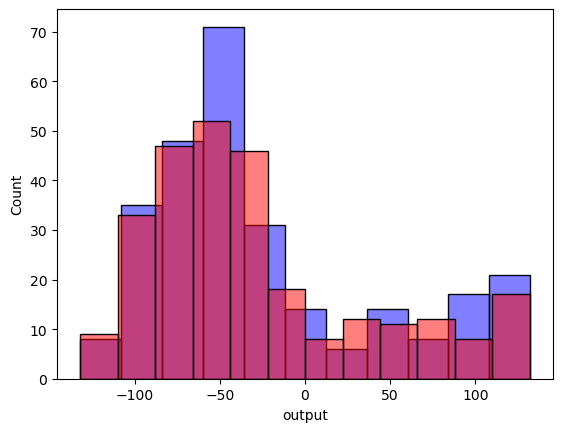

In [133]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [134]:

Mean_Absolute_Error_DTR = metrics.mean_absolute_error(y_test, y_test_pred)
Mean_Squared_Error_DTR = metrics.mean_squared_error(y_test, y_test_pred)
Root_Mean_Squared_Error_DTR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',Mean_Absolute_Error_DTR)
print('Mean Squared Error: ', Mean_Squared_Error_DTR)
print('Root Mean Squared Error: ', Root_Mean_Squared_Error_DTR)

Mean Absolute Error:  30.908289298655685
Mean Squared Error:  2913.6571939939117
Root Mean Squared Error:  53.978302992905505


# Random Forest Regression

In [135]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [136]:
test_pred = regressor.predict(X_test_transformed)

In [137]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

Actual  Predicted
1004  -15.000000 -11.000000
899   -97.376142 -79.156025
157   -67.569154 -50.565111
652  -104.595355 -55.570297
469    85.239286  77.056564

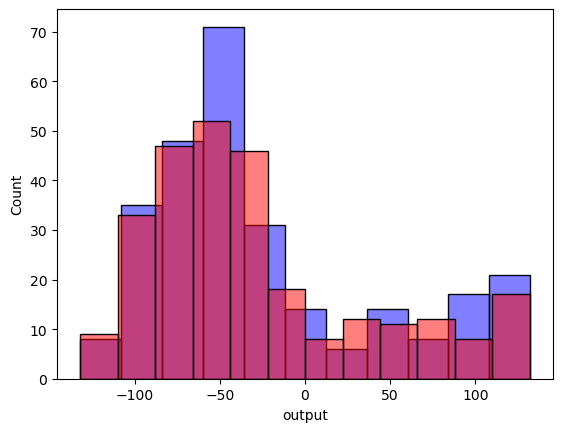

In [138]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [139]:

Mean_Absolute_Error_RF = metrics.mean_absolute_error(y_test, y_test_pred)
Mean_Squared_Error_RF = metrics.mean_squared_error(y_test, y_test_pred)
Root_Mean_Squared_Error_RF = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',Mean_Absolute_Error_RF)
print('Mean Squared Error: ', Mean_Squared_Error_RF)
print('Root Mean Squared Error: ', Root_Mean_Squared_Error_RF)

Mean Absolute Error:  30.908289298655685
Mean Squared Error:  2913.6571939939117
Root Mean Squared Error:  53.978302992905505


# Gradient Boosting Decision Tree

In [140]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit (X_train_transformed, y_train)

GradientBoostingRegressor()

In [141]:
y_test_pred = regressor.predict(X_test_transformed)

In [142]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

Actual  Predicted
1004  -15.000000  -9.025659
899   -97.376142 -82.137281
157   -67.569154 -39.362154
652  -104.595355 -82.137281
469    85.239286  68.862103

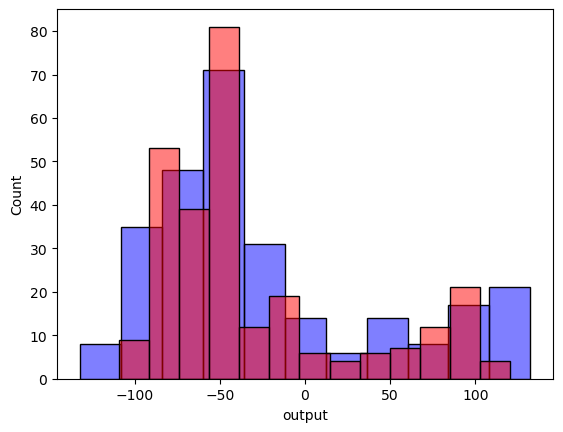

In [143]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [149]:
Mean_Absolute_Error_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
Mean_Squared_Error_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
Root_Mean_Squared_Error_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', Mean_Absolute_Error_GBDT)
print('Mean Squared Error: ', Mean_Squared_Error_GBDT )
print('Root Mean Squared Error: ',Root_Mean_Squared_Error_GBDT )

Mean Absolute Error:  25.164688989688035
Mean Squared Error:  2043.9034903822107
Root Mean Squared Error:  45.20955087569673


In [150]:
import numpy as np
data = np.array([
                 ['Linear Regression',round(Mean_Absolute_Error_LR,4),round(Mean_Squared_Error_LR,4),round(Root_Mean_Squared_Error_LR,4)],
                 ['KNN Regression',round(Mean_Absolute_Error_KNN,4),round(Mean_Squared_Error_KNN,4),round(Root_Mean_Squared_Error_KNN,4)],
                 ['Decision Tree Regression',round(Mean_Absolute_Error_DTR,4),round(Mean_Squared_Error_DTR,4),round(Root_Mean_Squared_Error_DTR,4)],
                 ['Random Forest Regression',round(Mean_Absolute_Error_RF,4),round(Mean_Squared_Error_RF,4),round(Root_Mean_Squared_Error_RF,4)],
                 ['Gradient Boosting Decision Tree',round(Mean_Absolute_Error_GBDT,4),round(Mean_Squared_Error_GBDT,4),round(Root_Mean_Squared_Error_GBDT,4)]
            ])
new_df = pd.DataFrame(data,columns = ['Algorithm','Mean_Absolute_Error','Mean_Squared_Error','Root_Mean_Squared_Error'])

# Observation

In [151]:
new_df

Algorithm Mean_Absolute_Error Mean_Squared_Error  \
0                Linear Regression             46.2907          3953.2253   
1                   KNN Regression             26.9781          2096.7405   
2         Decision Tree Regression             30.9083          2913.6572   
3         Random Forest Regression             30.9083          2913.6572   
4  Gradient Boosting Decision Tree             25.1647          2043.9035   

  Root_Mean_Squared_Error  
0                 62.8747  
1                 45.7902  
2                 53.9783  
3                 53.9783  
4                 45.2096

# Conclusion
- By comparing all algorithm the Gradient Boosting Decision Tree has a least mean absolute error.
- **Gradient Boosting Decision Tree Regression** algorithm is the best model for prediction.